# 0. Bibliotecas

In [29]:
# Data manipulation
import pandas as pd
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Obtenção dos dados

In [30]:
# !kaggle datasets download -d parisrohan/credit-score-classification

# 2. Importação dos dados

In [31]:
train = pd.read_csv('data/train.csv', low_memory=False)
test =  pd.read_csv('data/test.csv')

# 3. Inspeção geral dos dados

| Variável                  | Descrição                                                                 |
|---------------------------|---------------------------------------------------------------------------|
| ID                        | Identificador único da transação ou registro                               |
| Customer_ID               | Identificador único do cliente                                             |
| Month                     | Mês de referência da análise                                               |
| Name                      | Nome do cliente                                                            |
| Age                       | Idade do cliente                                                           |
| SSN                       | Número de Segurança Social (Social Security Number)                        |
| Occupation                | Ocupação profissional do cliente                                           |
| Annual_Income             | Renda anual do cliente                                                     |
| Monthly_Inhand_Salary      | Salário mensal disponível (em mãos)                                        |
| Num_Bank_Accounts          | Número de contas bancárias que o cliente possui                           |
| Num_Credit_Card            | Número de cartões de crédito que o cliente possui                         |
| Interest_Rate              | Taxa de juros aplicada aos empréstimos ou dívidas                         |
| Num_of_Loan                | Número de empréstimos que o cliente possui                                |
| Type_of_Loan               | Tipo de empréstimo (pessoal, hipotecário, etc.)                           |
| Delay_from_due_date        | Atraso em dias no pagamento após a data de vencimento                     |
| Num_of_Delayed_Payment     | Número de pagamentos atrasados                                             |
| Changed_Credit_Limit       | Alteração no limite de crédito                                             |
| Num_Credit_Inquiries       | Número de consultas de crédito feitas por instituições                    |
| Credit_Mix                 | Mistura de tipos de crédito (cartões, empréstimos, etc.)                  |
| Outstanding_Debt           | Dívida pendente do cliente                                                |
| Credit_Utilization_Ratio   | Proporção da utilização do crédito disponível                             |
| Credit_History_Age         | Tempo total de histórico de crédito do cliente                            |
| Payment_of_Min_Amount      | Se o cliente paga o valor mínimo da fatura (Sim/Não)                      |
| Total_EMI_per_month        | Total de parcelas mensais pagas pelo cliente                              |
| Amount_invested_monthly    | Quantia investida mensalmente pelo cliente                                |
| Payment_Behaviour          | Comportamento de pagamento (padrões e hábitos)                            |
| Monthly_Balance            | Saldo mensal disponível após todas as despesas                            |
| Credit_Score               | Pontuação de crédito do cliente                                           |
| target                     | Variável alvo ou de interesse criada a partir da variável **Credit_Score**|


In [32]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Para deixar o problema ainda mais próximo da área de crédito, optou-se por modificar as classes da seguinte maneira:

* Clientes classificados como `Poor` &#x27A1; `Classe 1` (maus pagadores)
* Clientes classifiados como `Standard` &#x27A1; `Classe 0` (bons pagadores)
* Clientes classifiados como `Good` &#x27A1; `Classe 0` (bons pagadores)

In [33]:
# Antes da modificação
train['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [34]:
# Modificando as classes para bons e maus pagadores

train['target'] = train['Credit_Score'].apply(lambda x: 1 if x == 'Poor' else 0)

In [35]:
# Checando as novas classes
train['target'].value_counts()

target
0    71002
1    28998
Name: count, dtype: int64

In [36]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,target
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,0


In [37]:
# Verificando a dimensionalidade dos dados
print(f'Total de linhas: {train.shape[0]}')
print(f'Total de colunas: {train.shape[1]}')

Total de linhas: 100000
Total de colunas: 29


# 4. EDA

## 4.1 Análises gerais

In [38]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,target
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,0


In [39]:
train = train.drop('Credit_Score', axis=1)

In [40]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'target'],
      dtype='object')

Todas as transformações acima devem ser aplicadas no teste. Verificar se vai executar aí em cima mesmo.

In [129]:
# Checando a proporção das classes

train['target'].value_counts(normalize=True,dropna=False)

target
0    0.71002
1    0.28998
Name: proportion, dtype: float64

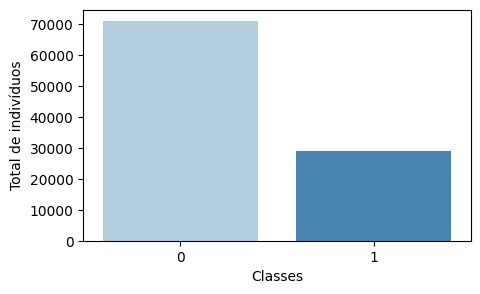

In [139]:
plt.figure(figsize=(5,3))
sns.countplot(x=train['target'], hue=train['target'], palette='Blues', legend=False)

plt.xlabel('Classes')
plt.ylabel('Total de indivíduos')
plt.show()

## 4.2 Analisando as variáveis categóricas

### Total de clientes únicos

In [41]:
train['Customer_ID'].nunique(0)

12500

### Volumetria de clientes por safra

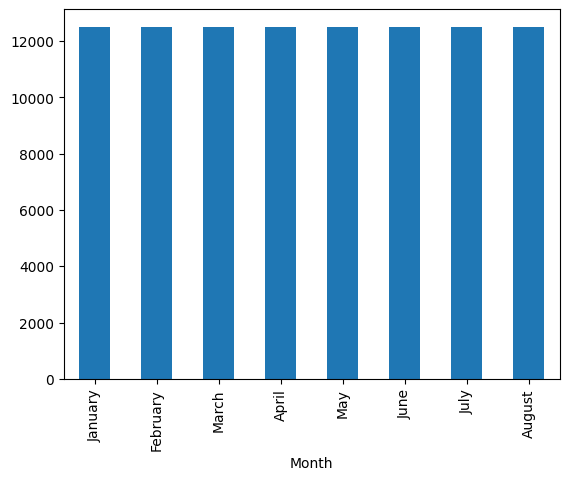

In [42]:
train['Month'].value_counts().plot(kind='bar');

Não foi percebida nenhuma variação na volumetria de clientes por safra (mês).

### Taxa de maus pagadores por ocupação

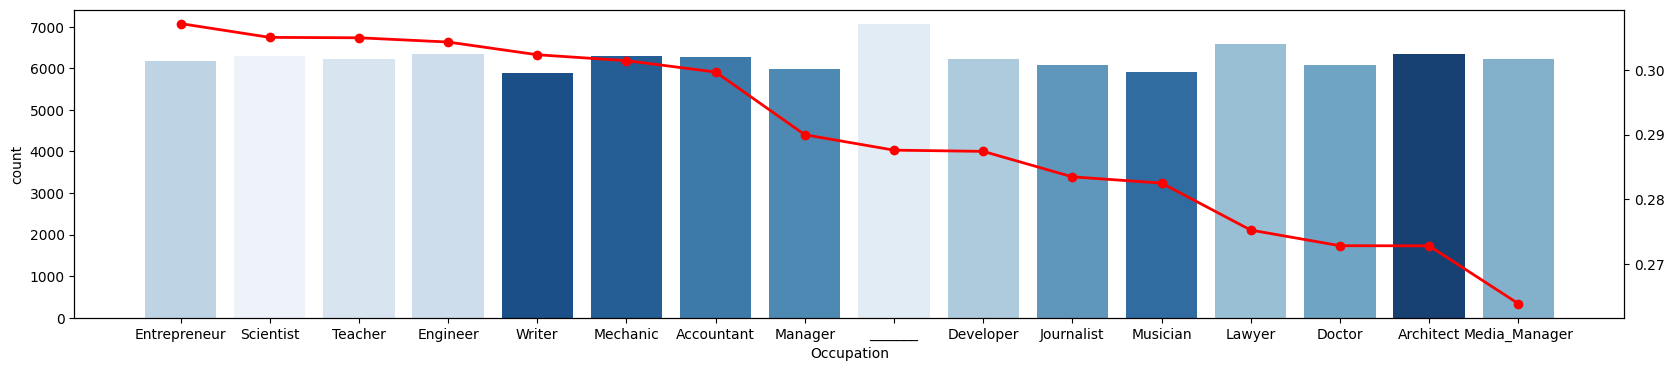

In [43]:
# Taxa de maus por ocupação

tx_maus_ocupacao = train.groupby(['Occupation'])['target'].mean().sort_values(ascending=False)

# Gráfico

fig, ax1 = plt.subplots(figsize=(20, 4))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Occupation', ax=ax1, palette='Blues', hue='Occupation', order=tx_maus_ocupacao.index)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_ocupacao.index, tx_maus_ocupacao.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.show()

In [44]:
print(f'Maior taxa de maus: {np.round(tx_maus_ocupacao,2).max()}')
print(f'Menorr taxa de maus: {np.round(tx_maus_ocupacao,2).min()}')

Maior taxa de maus: 0.31
Menorr taxa de maus: 0.26


A taxa de maus por ocupação varia pouco (diferença de 4%). Em todo caso, percebeu-se que _Media manager_ foi o que apresentou a menor taxa de maus pagadores, com 26%. Já a maior taxa ficou com _Entrepreneur_, com 31%.

### Verificando abaixo os perfis de pagamento dos clientes

In [45]:
train['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

* High_spent_Small_value_payments: Altos gastos em pagamentos de pequeno valor

* Low_spent_Large_value_payments: Baixos gastos em pagamentos de alto valor, sugerindo uma abordagem cuidadosa em grandes transações

* Low_spent_Medium_value_payments: Baixos gastos em pagamentos de valor médio

* Low_spent_Small_value_payments: Baixos gastos em pagamentos de pequeno valor

* High_spent_Medium_value_payments: Altos gastos em pagamentos de valor médio

* !@9#%8: Valor inválido ou outlier

* High_spent_Large_value_payments: Altos gastos em pagamentos de alto valor

### Taxa de maus por perfil de pagamento

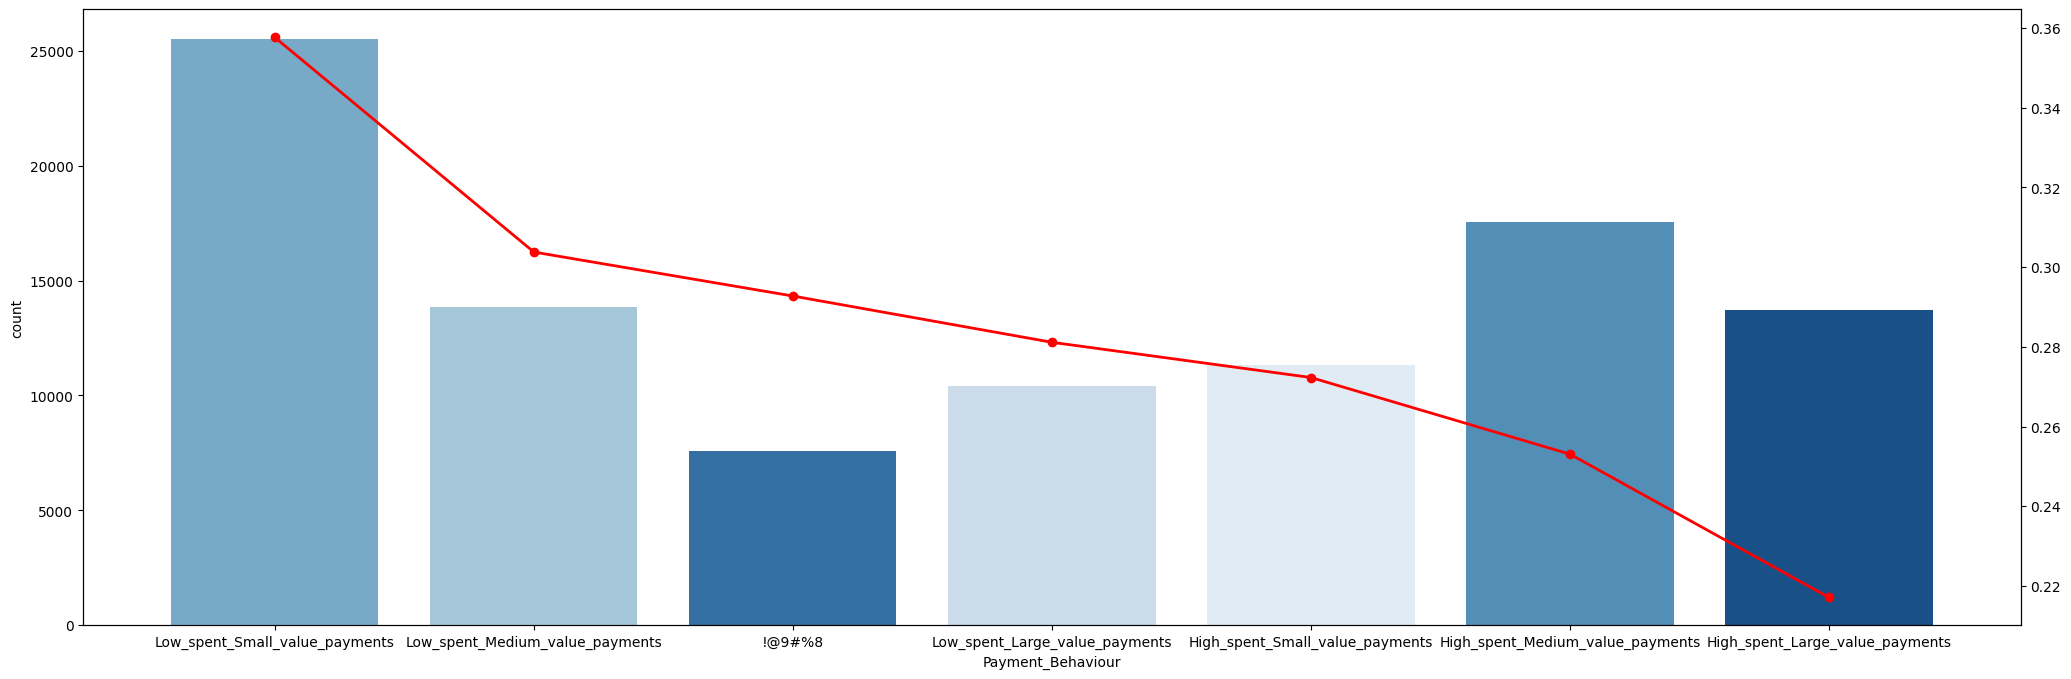

In [46]:
# Taxa de maus por perfil de pagamento

tx_maus_pagamento = train.groupby(['Payment_Behaviour'])['target'].mean().sort_values(ascending=False)

# Gráfico

fig, ax1 = plt.subplots(figsize=(25, 8))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Payment_Behaviour', ax=ax1, palette='Blues', hue='Payment_Behaviour', order=tx_maus_pagamento.index)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_pagamento.index, tx_maus_pagamento.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.show()

In [47]:
np.round(tx_maus_pagamento,2) 

Payment_Behaviour
Low_spent_Small_value_payments      0.36
Low_spent_Medium_value_payments     0.30
!@9#%8                              0.29
Low_spent_Large_value_payments      0.28
High_spent_Small_value_payments     0.27
High_spent_Medium_value_payments    0.25
High_spent_Large_value_payments     0.22
Name: target, dtype: float64

* Houve uma diferença de 14% entre a maior e menor taxa de maus

* Observou-se acima que a taxa de maus é maior em pessoas que possuem baixos gastos, destacando-se os baixos gastos em pagamentos de pequeno valor (_Low_spent_Small_value_payments_). Isso faz sentido, pois pode sugerir que as pessoas possuem uma renda menor.

* Também foi possível analisar que a taxa de maus é menor em pessoas que possuem altos gastos, destacando-se os clientes de altos gastos em pagamentos de alto valor (_High_spent_Large_value_payments_). Isso faz sentido, pois pode sugerir que as pessoas possuem uma renda maior.

### Taxa de maus pagadores por pagamento mínimo da fatura

Pagar apenas o valor mínimo da fatura do cartão de crédito significa que o cliente está adiando o pagamento completo do saldo para o futuro. Ou seja, o cliente paga um valor reduzido (ex: uma pequena porcentagem do saldo total ou uma quantia fixa) da fatura atual, no entanto, o saldo restante (não pago) é transferido para o mês seguinte. Esse saldo continua a acumular juros, o que pode aumentar a dívida ao longo do tempo, podendo ser fortemente associada ao aumento da taxa de maus pagadores.

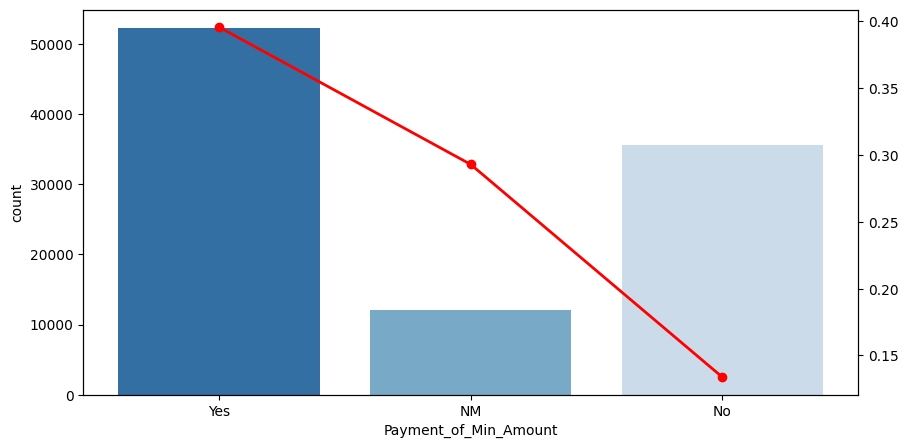

In [68]:
# Taxa de maus por perfil de pagamento

tx_maus_pay_min = train.groupby(['Payment_of_Min_Amount'])['target'].mean().sort_values(ascending=False)

# Gráfico

fig, ax1 = plt.subplots(figsize=(10, 5))

# Gráfico de barras para contagem de pessoas
sns.countplot(data=train, x='Payment_of_Min_Amount', ax=ax1, palette='Blues', hue='Payment_of_Min_Amount', order=tx_maus_pay_min.index)

# Configurando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(tx_maus_pay_min.index, tx_maus_pay_min.values, color='r', marker='o', linestyle='-', linewidth=2)
plt.show()

In [71]:
# Taxa de maus

np.round(tx_maus_pay_min,2)

Payment_of_Min_Amount
Yes    0.40
NM     0.29
No     0.13
Name: target, dtype: float64

* Houve uma diferença de 27% entre a maior e menor taxa de maus nessa variável;

* Observou-se acima que a taxa de maus é maior em pessoas que utilizam o recurso de pagamento do valor mínimo da fatura, como o esperado, pois o adiamento da dívida com juros mais alto aumenta ainda mais as chances de inadimplência;

* Também foi possível analisar que a taxa de maus é menor em pessoas que não utilizam esse recurso, também como o esperado.

### Distribuição de bons e maus pagadores pelo histórico de crédito

In [84]:
train['Credit_History_Age'].value_counts(0)

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [123]:
# Função para converter 'Years and Months' em meses
def convert_to_months(age):
    # Verifica se o valor não é nulo
    if isinstance(age, str):  # Apenas aplica split se for uma string
        years, months = age.split(' Years and ')
        return int(years) * 12 + int(months.split(' ')[0])
    else:
        return None  # Se for NaN, retorna None ou NaN

# Aplicando a função na coluna 'Credit_History_Age'
Credit_History_Age_Months = train['Credit_History_Age'].apply(convert_to_months)

In [124]:
Credit_History_Age_Months

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

In [126]:
# O que fazer com isso? Um groupby com o target?

Testar encoder: Leave One Out na Payment_Behaviour

## 4.3 Analisando as variáveis numéricas

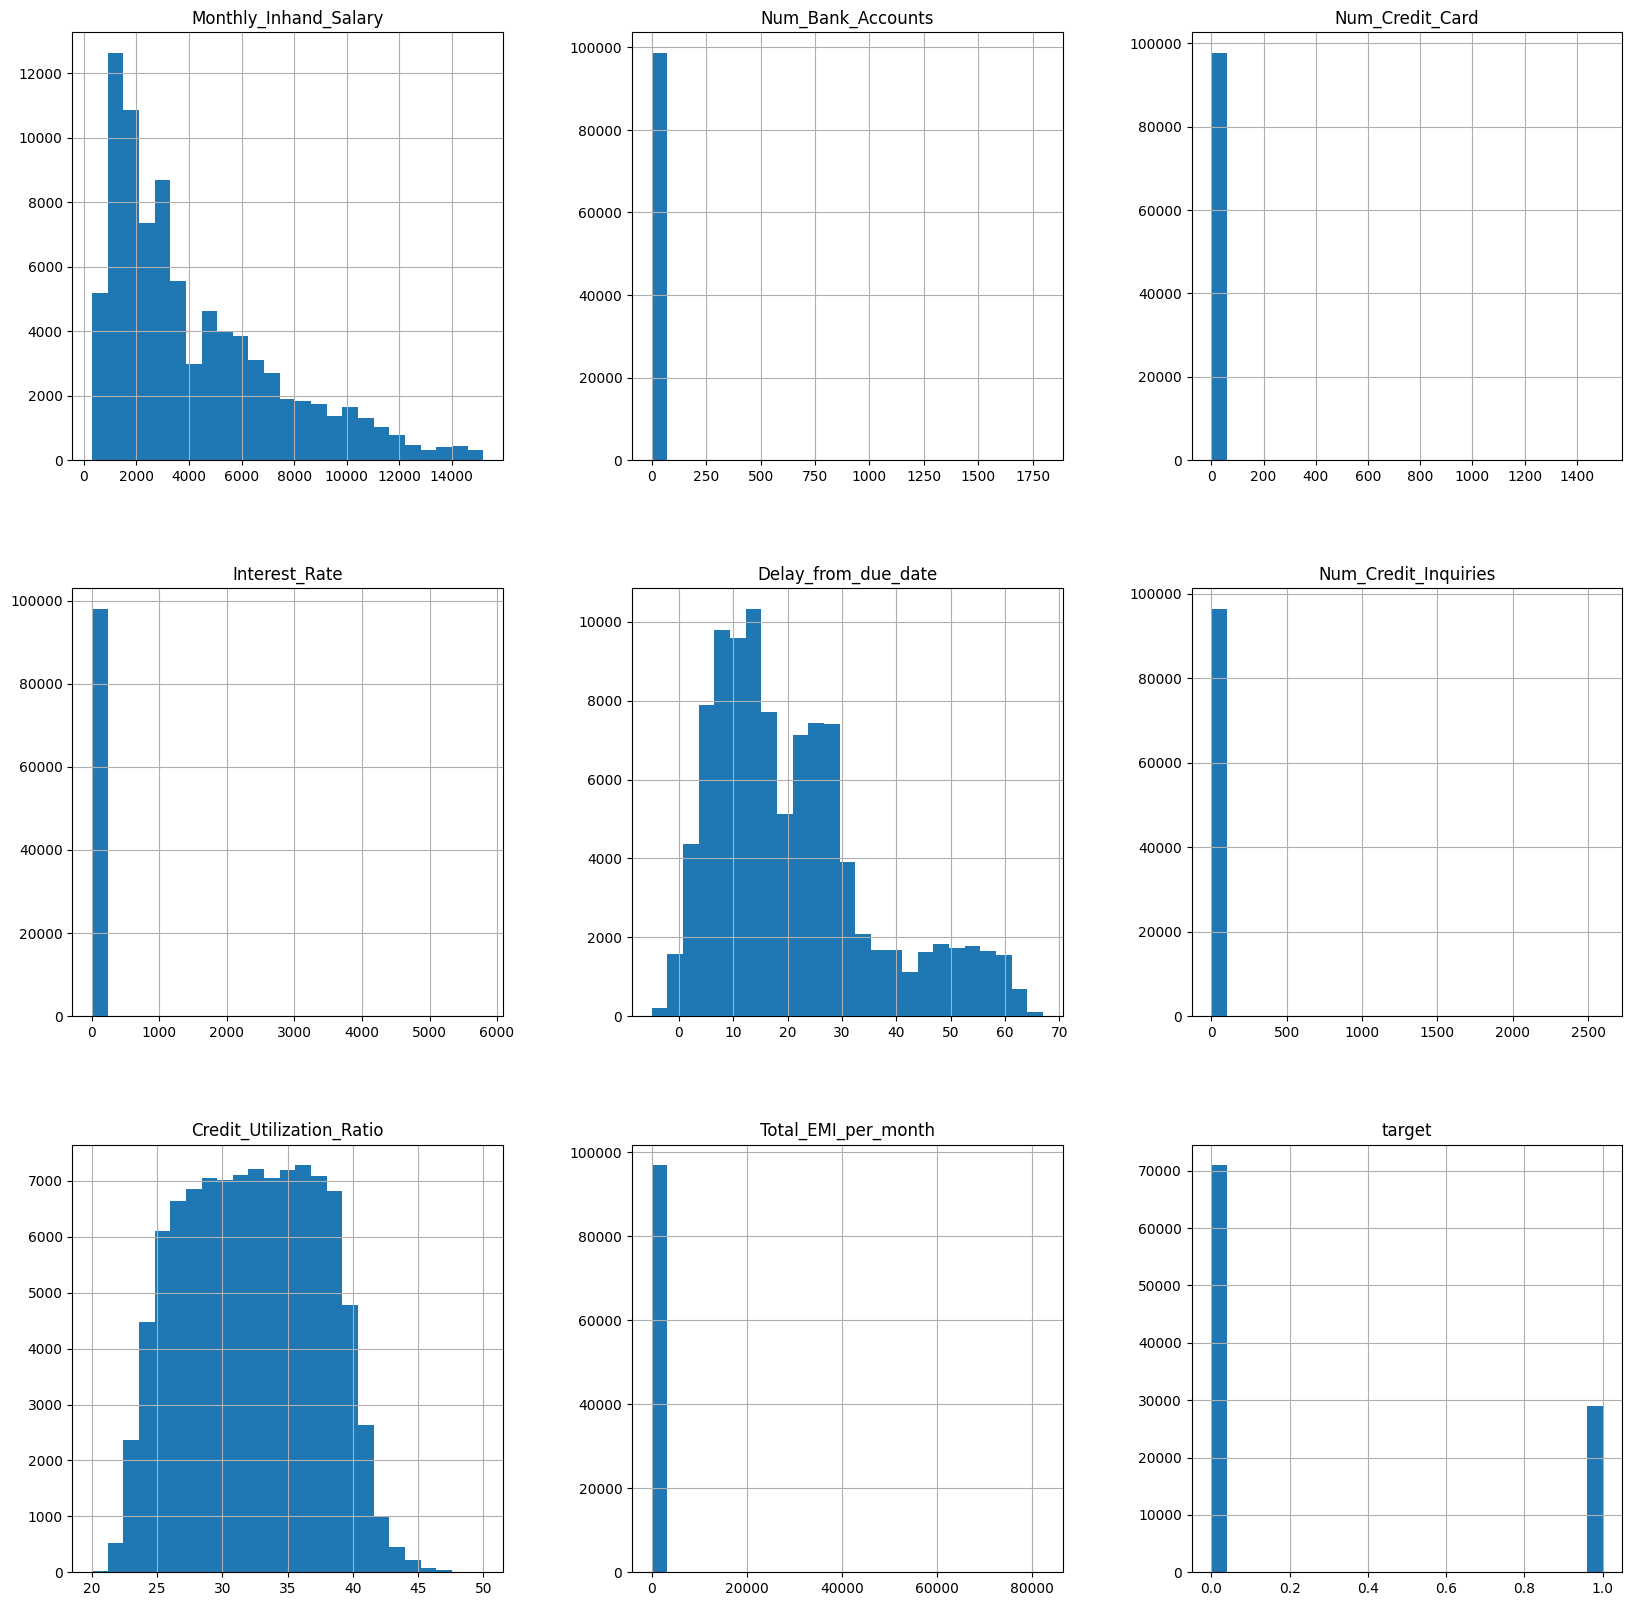

In [52]:
# Selecionando apenas as variáveis numéricas
num_train = train.select_dtypes([int,float])

# Plotando as distribuições
num_train.hist(figsize=(20,20),bins=25);

In [53]:
# Essa variavel pode ser um vazamento

train['Delay_from_due_date'].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

In [54]:
# Validação da base (procurando inconsistências)

In [55]:
train['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [56]:
train['Name'].unique()

array(['Aaron Maashoh', nan, 'Rick Rothackerj', ..., 'Chris Wickhamm',
       'Sarah McBridec', 'Nicks'], dtype=object)